In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import itertools

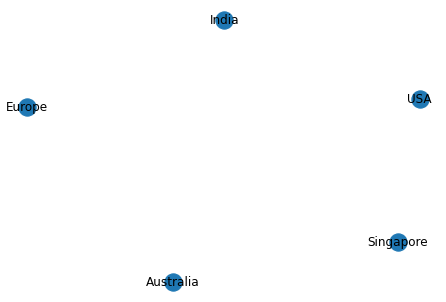

In [3]:
G = nx.Graph()
n =5
mapping ={1:'India',2:'USA',3:'Singapore',4:'Australia',5:'Europe'}
G.add_nodes_from([i for i in range(1,n+1)])
G = nx.relabel_nodes(G,mapping)
nx.draw(G,with_labels=True)

In [4]:
signs =['+','-']
for u in G.nodes():
    for v in G.nodes():
        if u!=v:
            G.add_edge(u,v,sign = random.choice(signs))

{('India', 'USA'): '-', ('India', 'Singapore'): '+', ('India', 'Australia'): '-', ('India', 'Europe'): '-', ('USA', 'Singapore'): '-', ('USA', 'Australia'): '+', ('USA', 'Europe'): '+', ('Singapore', 'Australia'): '+', ('Singapore', 'Europe'): '-', ('Australia', 'Europe'): '-'}


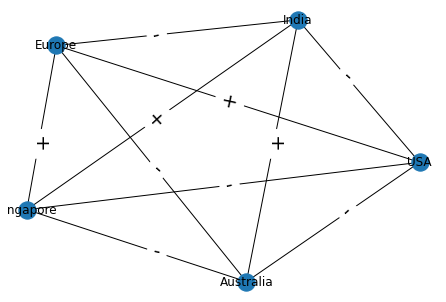

In [5]:
pos = nx.circular_layout(G)
edge_labels = nx.get_edge_attributes(G,"sign")
print(edge_labels)
nx.draw(G,with_labels = True)
nx.draw_networkx_edge_labels(G,pos,edge_labels,font_size =20)
plt.show()

In [6]:
nodes = G.nodes()
triangles = [list(x) for x in itertools.combinations(nodes,3)]
print(triangles)

[['India', 'USA', 'Singapore'], ['India', 'USA', 'Australia'], ['India', 'USA', 'Europe'], ['India', 'Singapore', 'Australia'], ['India', 'Singapore', 'Europe'], ['India', 'Australia', 'Europe'], ['USA', 'Singapore', 'Australia'], ['USA', 'Singapore', 'Europe'], ['USA', 'Australia', 'Europe'], ['Singapore', 'Australia', 'Europe']]


In [7]:
edge_labels = nx.get_edge_attributes(G,'sign')
print(edge_labels)

print(triangles[0][0])
print(triangles[0][1])
print(triangles[0][2])

print(edge_labels[(triangles[0][0], triangles[0][1] or edge_labels[(triangles[0][1],triangles[0][0])])])
print(edge_labels[(triangles[0][1], triangles[0][2] or edge_labels[(triangles[0][2],triangles[0][1])])])
print(edge_labels[(triangles[0][0], triangles[0][2] or edge_labels[(triangles[0][2],triangles[2][0])])])

{('India', 'USA'): '-', ('India', 'Singapore'): '+', ('India', 'Australia'): '-', ('India', 'Europe'): '-', ('USA', 'Singapore'): '-', ('USA', 'Australia'): '+', ('USA', 'Europe'): '+', ('Singapore', 'Australia'): '+', ('Singapore', 'Europe'): '-', ('Australia', 'Europe'): '-'}
India
USA
Singapore
-
-
+


In [8]:
def get_signs_of_all_triangles(triangles, G):
    all_signs = []
    for i in range(len(triangles)):
        temp = []
#         print(G[triangles[i][0]])
        temp.append(edge_labels[(triangles[i][0], triangles[i][1] or edge_labels[(triangles[i][1],triangles[i][0])])])
        temp.append(edge_labels[(triangles[i][1], triangles[i][2] or edge_labels[(triangles[i][2],triangles[i][0])])])
        temp.append(edge_labels[(triangles[i][0], triangles[i][2] or edge_labels[(triangles[i][2],triangles[2][i])])])
        all_signs.append(temp)
    return all_signs

get_signs_of_all_triangles(triangles, G)


[['-', '-', '+'],
 ['-', '+', '-'],
 ['-', '+', '-'],
 ['+', '+', '-'],
 ['+', '-', '-'],
 ['-', '-', '-'],
 ['-', '+', '+'],
 ['-', '-', '+'],
 ['+', '-', '+'],
 ['+', '-', '-']]

In [ ]:
def count_unstable(all_signs):
    stable = 0
    unstable = 0